# Flight_Price_Prediction_Project_Part_2 :-  Flip Robo Technologies   |   

# Internship Batch No-31


#### Submitted by: Tamali Saha (tamali428@gmail.com)

## Problem Statement:

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

#### STEPS:
1. Data Collection
You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, More the data better the model
In this section you have to scrape the data of flights from different websites (yatra.com, skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns areairline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.

2. Data Analysis
After cleaning the data, you have to do some analysis on the data. Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? What is the best time to buy so that the consumer can save the most by taking the least risk? Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are morning flights expensive?

3. Model Building
After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like:
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best mode

## Let's start Machine learning model building phase:

### Import Necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
# import train data and check 5 different samples

data = pd.read_excel('Final_Flight_Price_Details.xlsx')
data.sample(n=5)

,Airlines_name,Journey_class,Aeroplane_model,Date,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
1739,Vistara Business,Business,UK-774/851,"Wed, 18 Jan",Kolkata,Bangalore,20:40,08:45\n+ 1 day,12h 05m,1 Stop,47158
2330,Air India Business,Business,AI-402/815,"Fri, 21 Apr",Kolkata,Bangalore,10:30,18:20,7h 50m,1 Stop,60996
1312,Air India,Economy,AI-763/807,"Fri, 21 Apr",Kolkata,Bangalore,06:50,20:15,13h 25m,1 Stop,12408
378,IndiGo,Economy,6E-6513,"Sat, 28 Jan",Kolkata,Bangalore,08:25,11:10,2h 45m,Non Stop,8712
495,IndiGo,Economy,6E-647/605,"Wed, 1 Feb",Kolkata,Bangalore,04:45,13:55,9h 10m,1 Stop,6507


## 1. Data Cleaning:

In [3]:
print('No. of Rows :',data.shape[0])
print('No. of Columns :',data.shape[1])

No. of Rows : 2350
No. of Columns : 11


In [4]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Price'], object: ['Airlines_name', 'Journey_class', 'Aeroplane_model', 'Date', 'Source', 'Destination', 'Departure_Time', 'Arrival_Time', 'Duration', 'Total_Stops']}

#### Observation:

1. This dataset contain 2350 rows and 11 columns.
2. Our target feature is Price.
3. All of the features are categorical.

### Data Preprocessing:

In [5]:
data.isin(['--','null','NA',' ']).sum().any()

False

In [6]:
data.isnull().sum()

Airlines_name      0
Journey_class      0
Aeroplane_model    0
Date               0
Source             0
Destination        0
Departure_Time     0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

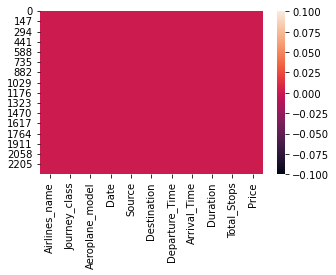

In [7]:
plt.figure(figsize=(5,3))
sns.heatmap(data.isnull())
plt.show()

In [8]:
data.duplicated().sum()

0

#### Observations:

1. There is no '--','null','NA',' ' in this dataset.
2. There is no duplicate value.
3. There is no null value.

In [9]:
data["Airlines_name"].unique()

array(['IndiGo', 'Air Asia', 'Go First', 'SpiceJet', 'Vistara',
       'Air India', 'Vistara Premium Economy', 'Air India Business',
       'Vistara Business'], dtype=object)

#### Conversion of Duration column hr & Minutes format to Minutes

In [10]:
data["Duration"].unique()

array(['6h 20m', '7h 20m', '8h 55m', '9h 20m', '9h 55m', '10h 05m',
       '10h 40m', '9h 15m', '3h 40m', '4h 55m', '7h 45m', '2h 35m',
       '2h 40m', '6h 30m', '6h 50m', '9h 30m', '8h 45m', '2h 45m',
       '8h 25m', '7h 35m', '8h 15m', '9h 10m', '9h 25m', '3h 30m',
       '5h 00m', '13h 00m', '24h 30m', '8h 10m', '2h 25m', '8h 00m',
       '10h 10m', '11h 55m', '13h 35m', '30h 05m', '7h 00m', '14h 30m',
       '28h 25m', '5h 20m', '21h 10m', '15h 20m', '26h 55m', '41h 40m',
       '15h 30m', '16h 10m', '28h 35m', '7h 25m', '5h 55m', '11h 20m',
       '23h 00m', '15h 15m', '17h 50m', '25h 10m', '27h 15m', '6h 45m',
       '22h 35m', '17h 05m', '15h 25m', '16h 15m', '18h 50m', '26h 10m',
       '11h 05m', '8h 30m', '11h 00m', '12h 55m', '14h 55m', '6h 00m',
       '21h 05m', '5h 40m', '16h 05m', '16h 00m', '14h 20m', '20h 35m',
       '5h 30m', '9h 50m', '13h 15m', '16h 30m', '24h 15m', '14h 00m',
       '7h 50m', '14h 10m', '9h 45m', '11h 40m', '12h 10m', '12h 05m',
       '22h 30m'

In [11]:
data['Duration'] = data['Duration'].map(lambda x : x.replace('05m','5m'))

In [12]:
data['Duration_in_min'] = data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
data.drop(['Duration'], inplace= True, axis=1)

#### Observations:

1. There are total 9 Airlines names in this dataset.
2. Here we want to convert hour-minutes into minutes. So here we convert 05 minutes into 5 minutes before starting the conversion.  Then we apply this method and convert duration of journey into minutes.

#### Create new column for day & date:

In [13]:
data["Date"].unique()

array(['Mon, 9 Jan', 'Wed, 18 Jan', 'Mon, 23 Jan', 'Sat, 28 Jan',
       'Wed, 1 Feb', 'Thu, 2 Feb', 'Fri, 3 Feb', 'Sat, 4 Feb',
       'Thu, 23 Feb', 'Tue, 21 Mar', 'Fri, 21 Apr'], dtype=object)

In [14]:
data['Journey_Day']= data['Date'].map(lambda x :x[:3])
data['Journey_Day'].unique()

array(['Mon', 'Wed', 'Sat', 'Thu', 'Fri', 'Tue'], dtype=object)

In [15]:
data['Journey_Date']= data['Date'].map(lambda x :x[4:])
data['Journey_Date'].unique()

array([' 9 Jan', ' 18 Jan', ' 23 Jan', ' 28 Jan', ' 1 Feb', ' 2 Feb',
       ' 3 Feb', ' 4 Feb', ' 23 Feb', ' 21 Mar', ' 21 Apr'], dtype=object)

In [16]:
data.drop(['Date'], inplace= True, axis=1)

#### Observations:

1. There are 13 different Date of journey (During webscrapping, total 13 different dates are taken).
2. Create new column for Journey_Day, Journey_Date. 

In [17]:
data.describe()

,Price,Duration_in_min
count,2350.000000,2350.000000
mean,25507.974043,798.029787
std,22284.540695,434.118151
min,6507.000000,135.000000
25%,10642.000000,465.000000
50%,13471.000000,725.000000
75%,47158.000000,1035.000000
max,109358.000000,2500.000000


In [18]:
data.describe(include=object)

,Airlines_name,Journey_class,Aeroplane_model,Source,Destination,Departure_Time,Arrival_Time,Total_Stops,Journey_Day,Journey_Date
count,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
unique,9,3,266,1,1,90,144,3,6,11
top,Vistara,Economy,UK-720/817,Kolkata,Bangalore,10:15,22:40,1 Stop,Fri,3 Feb
freq,442,1355,31,2350,2350,226,142,1934,440,225


## EDA:

### Exploration of categorical features:

#### Target Variable : 

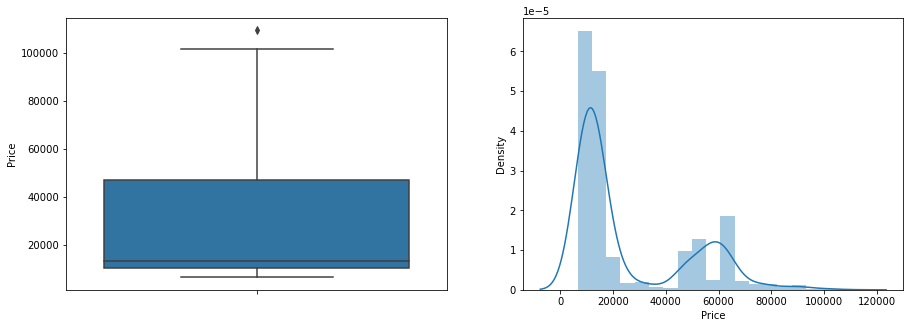

In [19]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y= 'Price', data= data,ax=ax[0])
sns.distplot(data['Price'] ,ax=ax[1])
plt.show()

#### Observations:

1. Outliers are present in the target variable.
2. Target variable is right skewed.


### 1. Journey_Day and Price relationship:

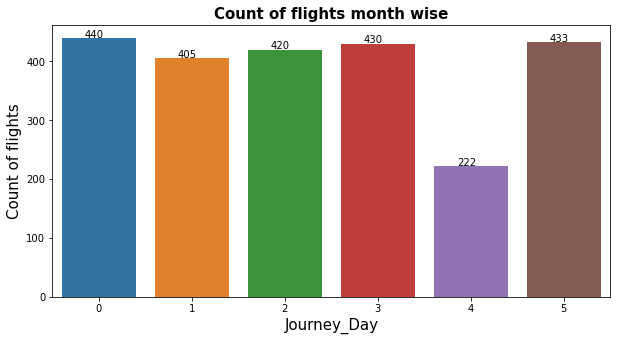

In [64]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise',fontsize=15,fontweight ='bold' )
ax=sns.countplot(x = 'Journey_Day', data = data)
plt.xlabel('Journey_Day',fontsize = 15)
plt.ylabel('Count of flights',fontsize = 15)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1))

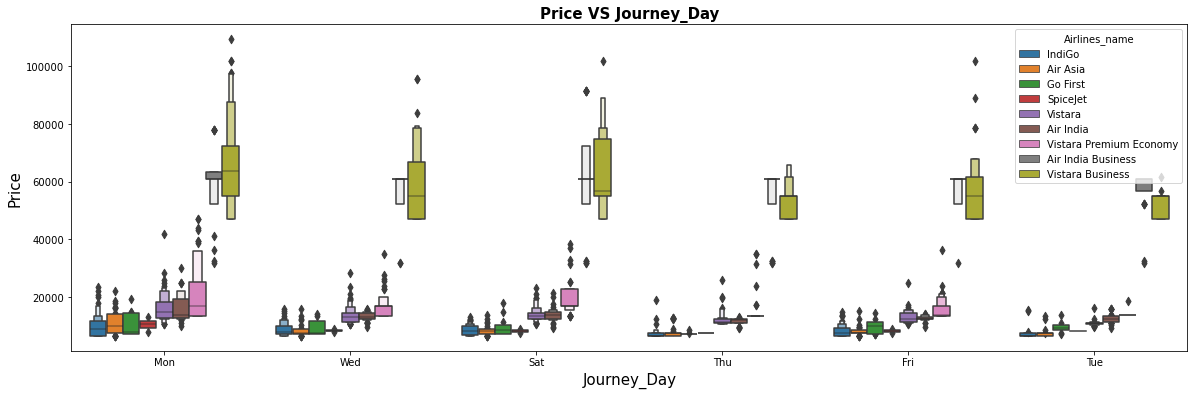

In [21]:
plt.figure(figsize =(20,6))
sns.boxenplot(y= data['Price'],x=data['Journey_Day'], hue= data['Airlines_name'])
plt.title("Price VS Journey_Day",fontsize=15,fontweight ='bold')
plt.xlabel('Journey_Day',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.show()

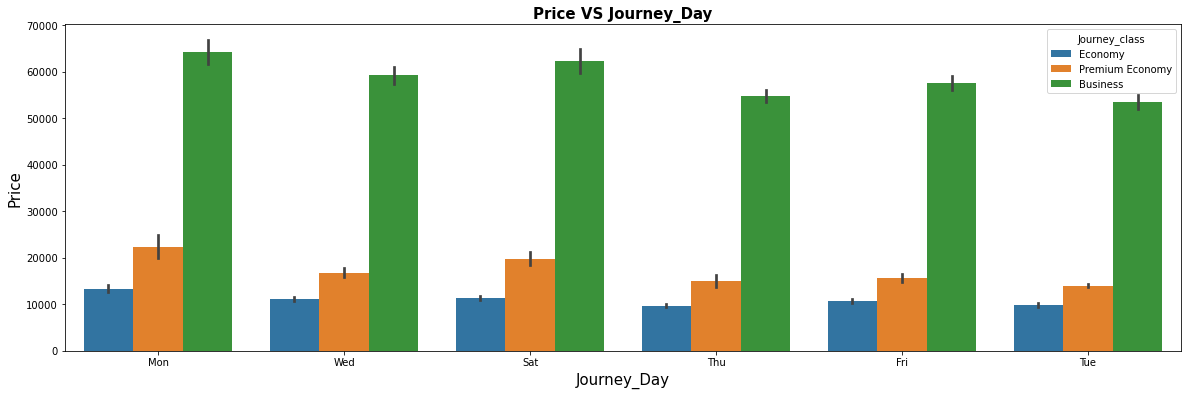

In [23]:
plt.figure(figsize =(20,6))
sns.barplot(y= data['Price'],x=data['Journey_Day'], hue= data['Journey_class'])
plt.title("Price VS Journey_Day",fontsize=15,fontweight ='bold')
plt.xlabel('Journey_Day',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.show()

#### Observations:

1. On Tuesday minimum flights run while on Friday maximum flights run.
2. Eveyday all of the three types of flights are running and very obviously business class's cost is high than other two for each days.
3. Maximum Avg. Fare for Business Flights is on Monday while minimum Avg. Fare for Business flights on Tuesday.
4. For Ecomony Flights & Premium Ecomony Flights: Minimum Avg. Fare on Thusday.
5. For Ecomony Flights & Premium Ecomony Flights: Maximum Avg. Fare on Monday.


### 2. Journey_Date and Price relationship:

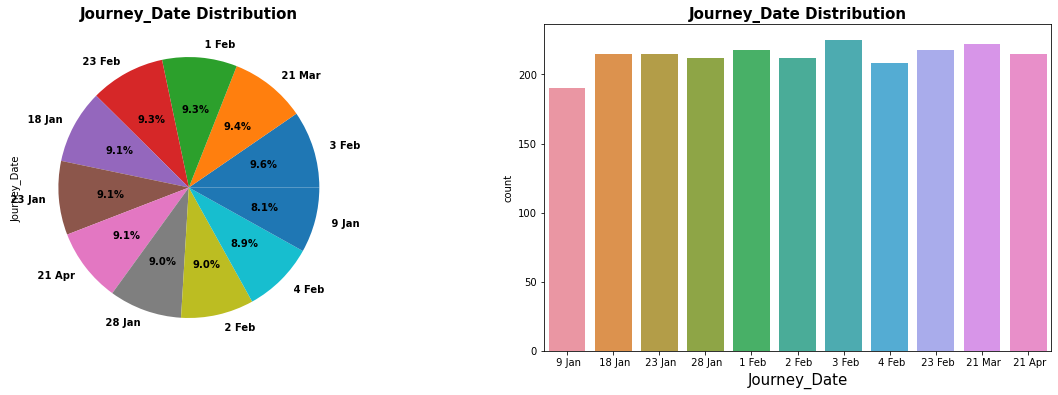

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,6))

data['Journey_Date'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Journey_Date Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Journey_Date',data=data ,ax=ax[1])
ax[1].set_title('Journey_Date Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('Journey_Date',fontsize=15)
plt.show()

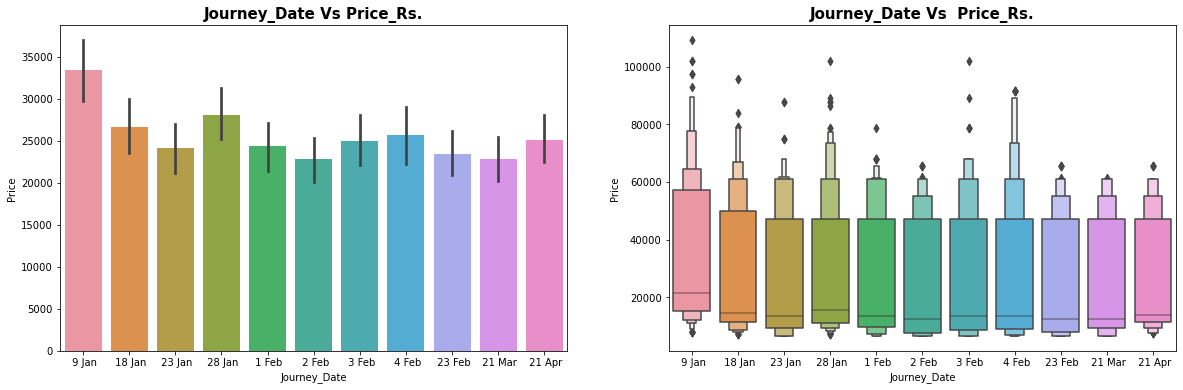

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.barplot(x=data['Journey_Date'], y=data['Price'], ax=ax[0])
ax[0].set_title('Journey_Date Vs Price_Rs.', fontsize=15,fontweight ='bold')

sns.boxenplot(x=data['Journey_Date'], y=data['Price'],ax=ax[1])
ax[1].set_title('Journey_Date Vs  Price_Rs.',fontsize=15,fontweight ='bold')
plt.show()

#### Observations:

1. We have scrapped overall same percent of data in this big dataset.
2. All the data scrapped on 7th January, 2023. So for 9th January the rate is maximum and for March and April the price is least than earlier.


### 3. Airlines_name and Price relationship:

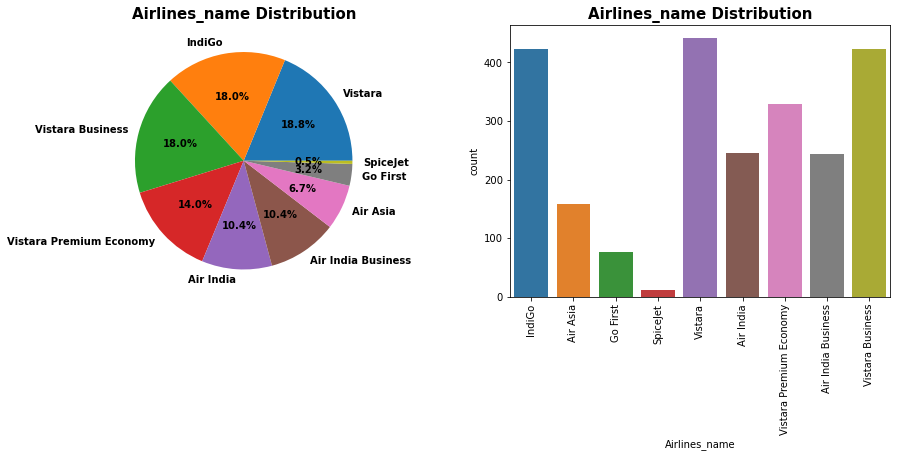

In [24]:
f,ax=plt.subplots(1,2,figsize=(15,5))

data['Airlines_name'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Airlines_name Distribution', fontsize=15,fontweight ='bold')
ax[0].set_ylabel('')
plt.xticks(rotation=90)
sns.countplot('Airlines_name',data=data ,ax=ax[1])
ax[1].set_title('Airlines_name Distribution',fontsize=15,fontweight ='bold')
plt.show()

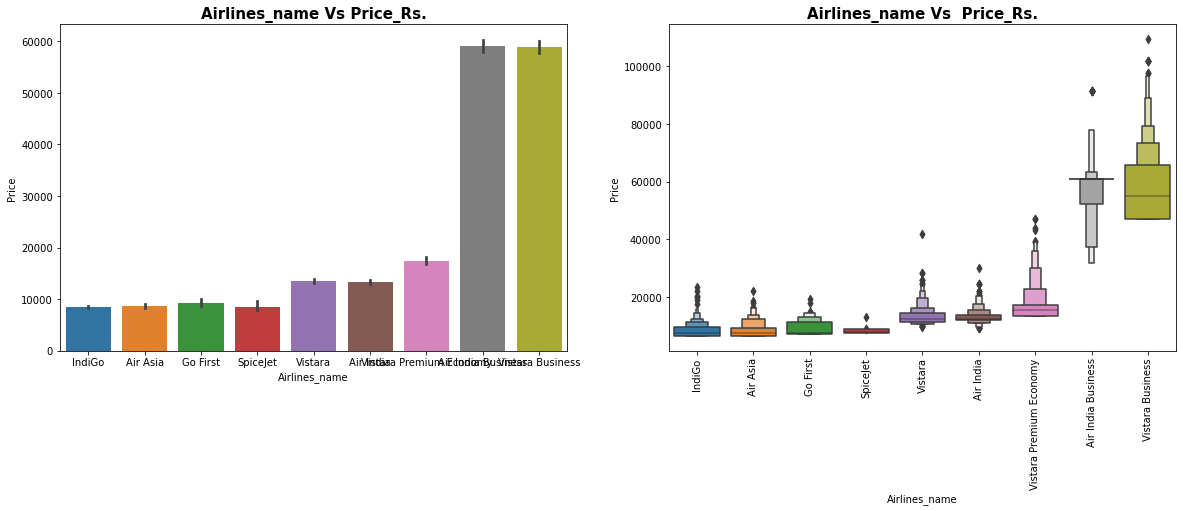

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,6))
sns.barplot(x=data['Airlines_name'], y=data['Price'], ax=ax[0])
ax[0].set_title('Airlines_name Vs Price_Rs.', fontsize=15,fontweight ='bold')
plt.xticks(rotation=90)
sns.boxenplot(x=data['Airlines_name'], y=data['Price'],ax=ax[1])
ax[1].set_title('Airlines_name Vs  Price_Rs.',fontsize=15,fontweight ='bold')
plt.show()

#### Observations:

1. We can see maximum number of flights run by Vistara Economy while minimum Flights run by Spicejet.
2. Around 28% of flights of Business Class.
3. For Economy class, SpiceJet flight is cheaper than Vistara and Air India.

### 4. Departure_Time and Price relationship:

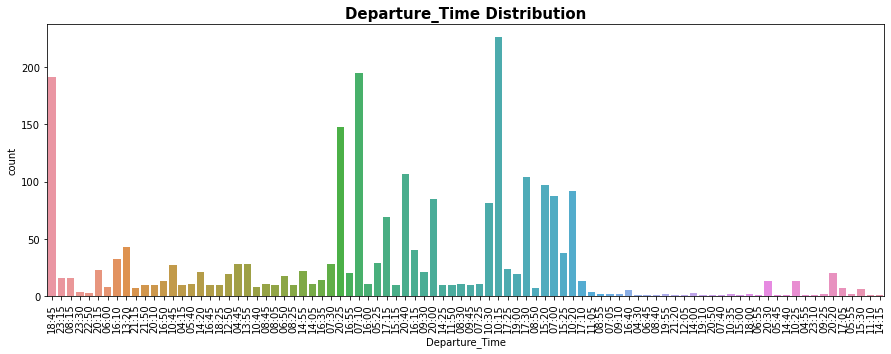

In [26]:
plt.figure(figsize=(15,5))
sns.countplot('Departure_Time',data=data)
plt.title('Departure_Time Distribution',fontsize=15,fontweight ='bold')
plt.xticks(rotation= 90)
plt.show()

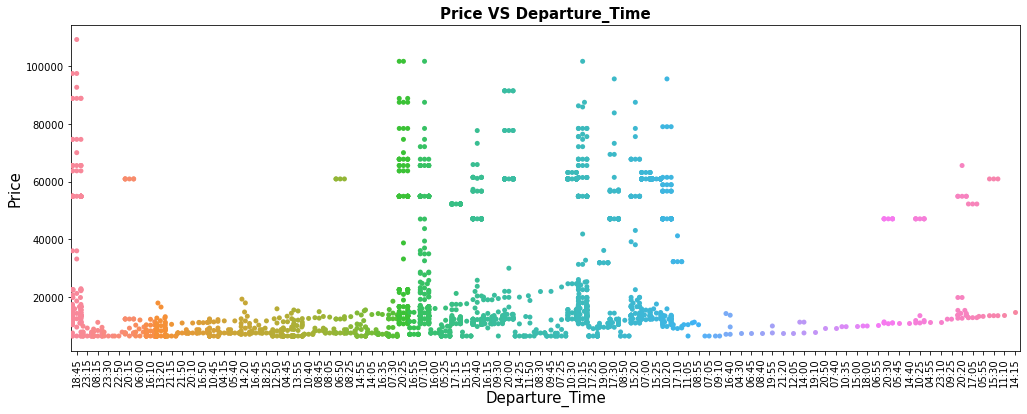

In [27]:
plt.figure(figsize =(17,6))
sns.swarmplot(y= data['Price'],x=data['Departure_Time'])
plt.title("Price VS Departure_Time",fontsize=15,fontweight ='bold')
plt.xlabel('Departure_Time',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.xticks(rotation=90)
plt.show()



### 5. Arrival_Time and Price relationship:

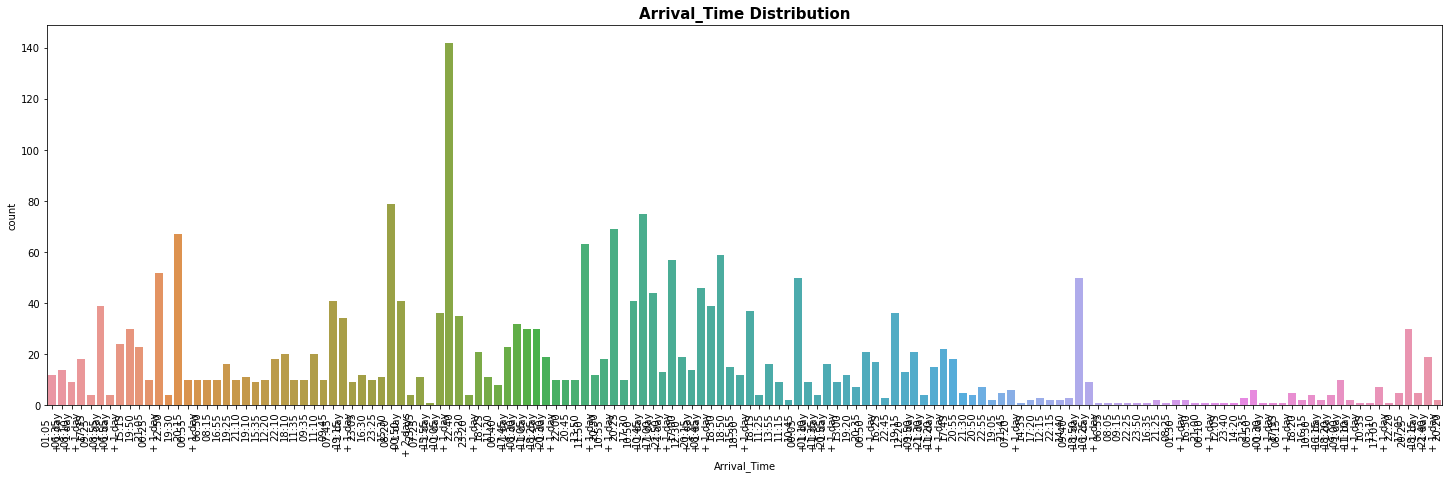

In [31]:
plt.figure(figsize=(25,7))
sns.countplot('Arrival_Time',data=data)
plt.title('Arrival_Time Distribution',fontsize=15,fontweight ='bold')
plt.xticks(rotation= 90)
plt.show()

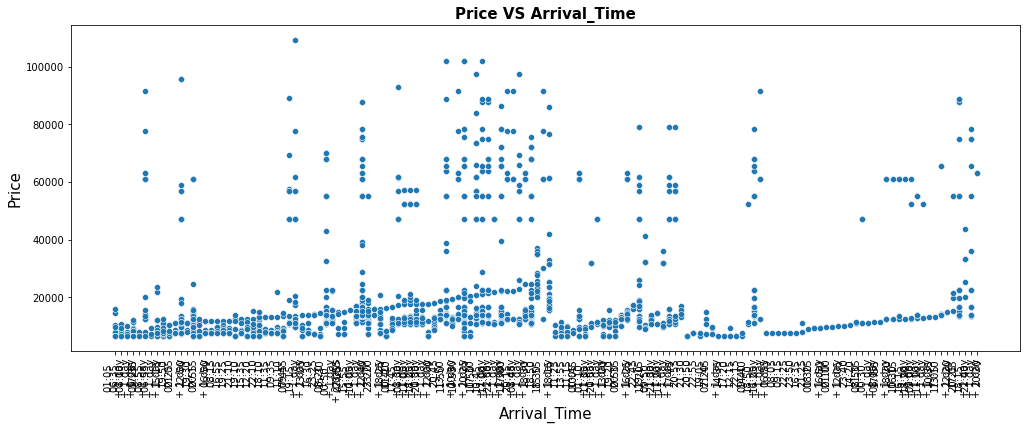

In [29]:
plt.figure(figsize =(17,6))
sns.scatterplot(y= data['Price'],x=data['Arrival_Time'])
plt.title("Price VS Arrival_Time",fontsize=15,fontweight ='bold')
plt.xlabel('Arrival_Time',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.xticks(rotation=90)
plt.show()

#### Observations:


1. There is no such relation between Departure_Time and number of flights. Though maximum flights departed at 10.15 am.
2. No such relation between Arrival_Time and Departure_Time with Price of the flight.

### 6. Total_Stops and Price relationship:

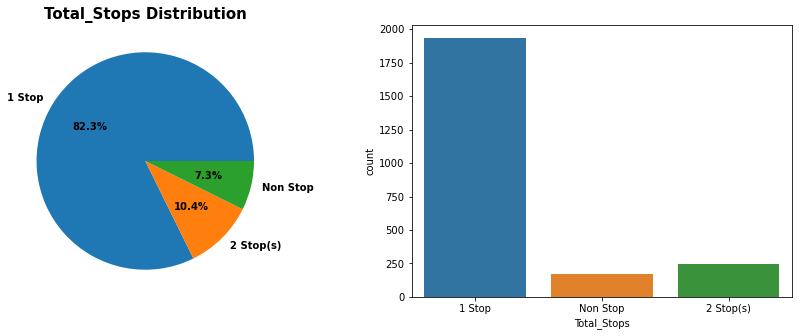

In [30]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['Total_Stops'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Total_Stops Distribution', fontsize=15,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Total_Stops',data=data ,ax=ax[1])
plt.show()

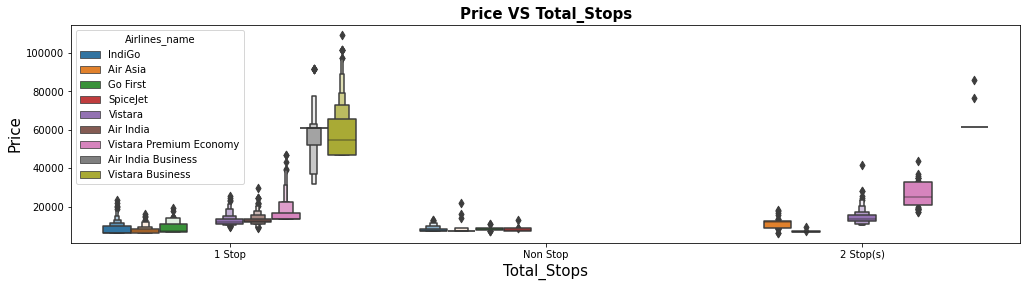

In [31]:
plt.figure(figsize =(17,4))
sns.boxenplot(y= data['Price'],x=data['Total_Stops'], hue=data['Airlines_name'] )
plt.title("Price VS Total_Stops",fontsize=15,fontweight ='bold')
plt.xlabel('Total_Stops',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.show()

#### Observations:
1. Around 82% flights are 1 stop from kolkata to Bangalore. Obviously these flights have high flight duration compare to Non-stop Flight
2. Only 7.3% of flights do not have any stop in there route.
3. Most of the cases, Vistara Business class flight is 1 stop and it's price is also high than others.

### 7. Journey_class and Price relationship:

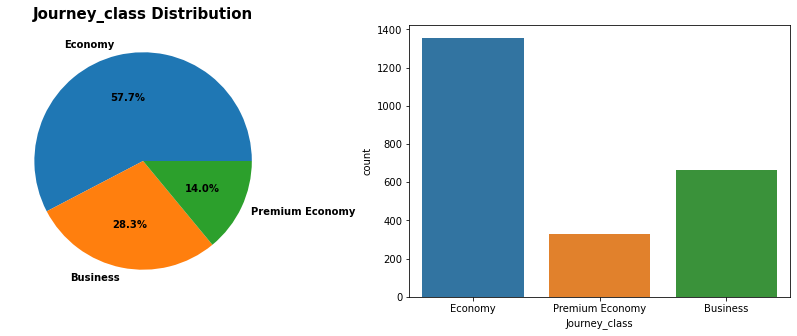

In [32]:
f,ax=plt.subplots(1,2,figsize=(15,5))

data['Journey_class'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Journey_class Distribution', fontsize=15,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Journey_class',data=data ,ax=ax[1])
plt.show()

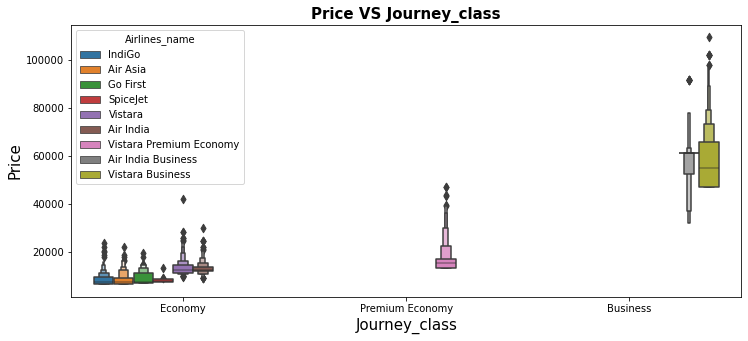

In [33]:
plt.figure(figsize =(12,5))
sns.boxenplot(y= data['Price'],x=data['Journey_class'], hue=data['Airlines_name'] )
plt.title("Price VS Journey_class",fontsize=15,fontweight ='bold')
plt.xlabel('Journey_class',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.show()

#### Observations:

1. 57.7% flights are of Ecomony class, as they are low cost of flight & most of people prefer it.
2. There are more business class flights than Premuim Ecomony flights. It strange because Business class is costlier than Premuim Ecomony class.

### 8. Duration_in_min and Price relationship:

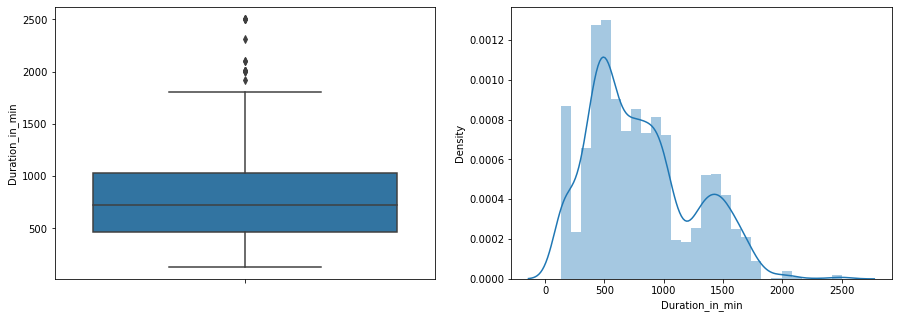

In [34]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y= 'Duration_in_min', data= data,ax=ax[0])
sns.distplot(data['Duration_in_min'] ,ax=ax[1])
plt.show()

Text(0, 0.5, 'Price')

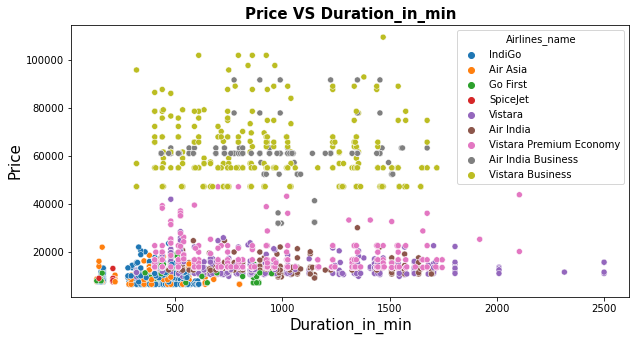

In [35]:
plt.figure(figsize =(10,5))
sns.scatterplot(y= data['Price'],x=data['Duration_in_min'], hue= data['Airlines_name'] )
plt.title("Price VS Duration_in_min",fontsize=15,fontweight ='bold')
plt.xlabel('Duration_in_min',fontsize = 15)
plt.ylabel('Price',fontsize = 15)

#### Observations:

1. Outliers are present in the Duration dataset. 
2. No such relation between duration and price of the flight.

## Multivariate Analysis (Relation between different features of the dataset):

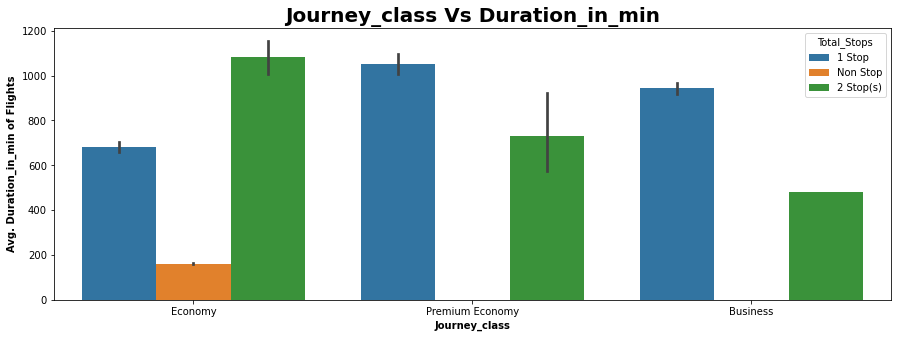

In [26]:
plt.figure(figsize =(15,5))
sns.barplot(x=data['Journey_class'],y=data['Duration_in_min'],hue=data['Total_Stops'])
plt.title("Journey_class Vs Duration_in_min",fontsize=20,fontweight ='bold')
plt.xlabel('Journey_class',fontweight ='bold')
plt.ylabel('Avg. Duration_in_min of Flights',fontweight ='bold')
plt.show()

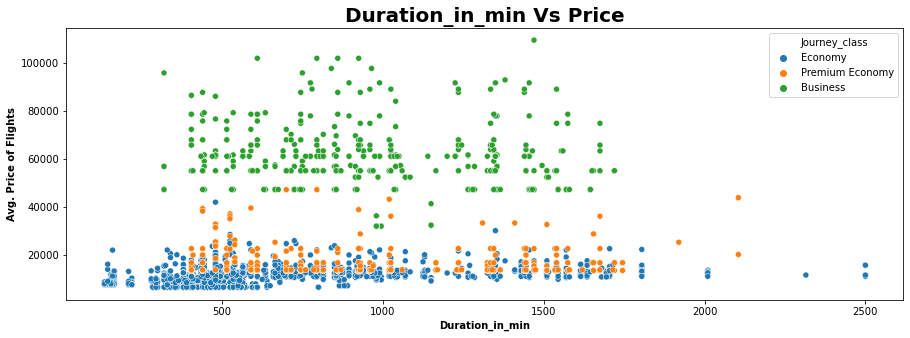

In [34]:
plt.figure(figsize =(15,5))
sns.scatterplot(x=data['Duration_in_min'],y=data['Price'],hue=data['Journey_class'])
plt.title("Duration_in_min Vs Price",fontsize=20,fontweight ='bold')
plt.xlabel('Duration_in_min',fontweight ='bold')
plt.ylabel('Avg. Price of Flights',fontweight ='bold')
plt.show()

#### Observations:

1. As number of Stops increase the duration of flights increases for economy class.
2. For Premium economy or Business class there are no nonstop flights.
3. Very surprisingly for Business class the duration of 1 stop flight is more than 2 stops. 
4. For both maximum and minimum duration of flight, the flight type is Economy class.

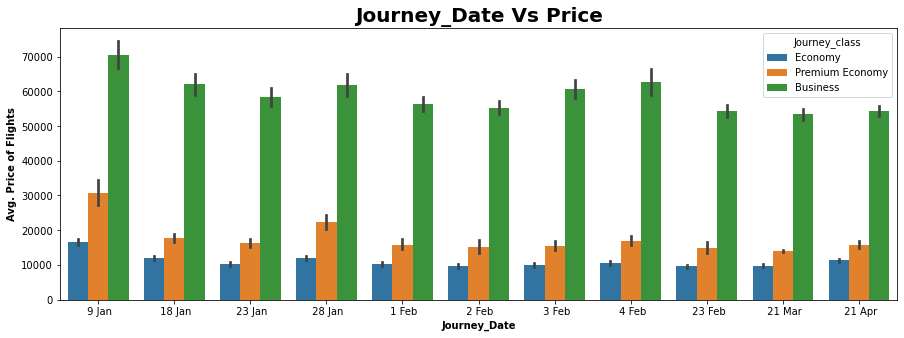

In [37]:
plt.figure(figsize =(15,5))
sns.barplot(x=data['Journey_Date'],y=data['Price'],hue=data['Journey_class'])
plt.title("Journey_Date Vs Price",fontsize=20,fontweight ='bold')
plt.xlabel('Journey_Date',fontweight ='bold')
plt.ylabel('Avg. Price of Flights',fontweight ='bold')
plt.show()

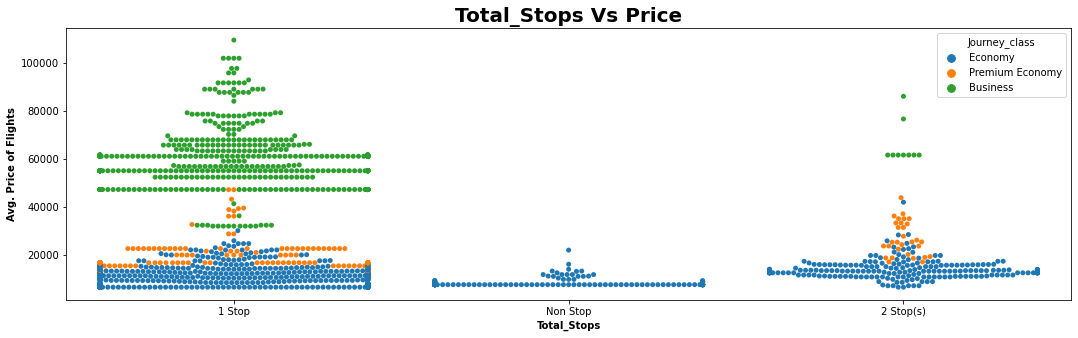

In [30]:
plt.figure(figsize =(18,5))
sns.swarmplot(x=data['Total_Stops'],y=data['Price'],hue=data['Journey_class'])
plt.title("Total_Stops Vs Price",fontsize=20,fontweight ='bold')
plt.xlabel('Total_Stops',fontweight ='bold')
plt.ylabel('Avg. Price of Flights',fontweight ='bold')
plt.show()

#### Observations:

1. For four consecutive day in February 2023 (1st Feb to 4th Feb), maximum average price is for 4th February 2023, Saturday. 
2. For every stops,  maximum average price is for Business class and minimum for economy class.
 

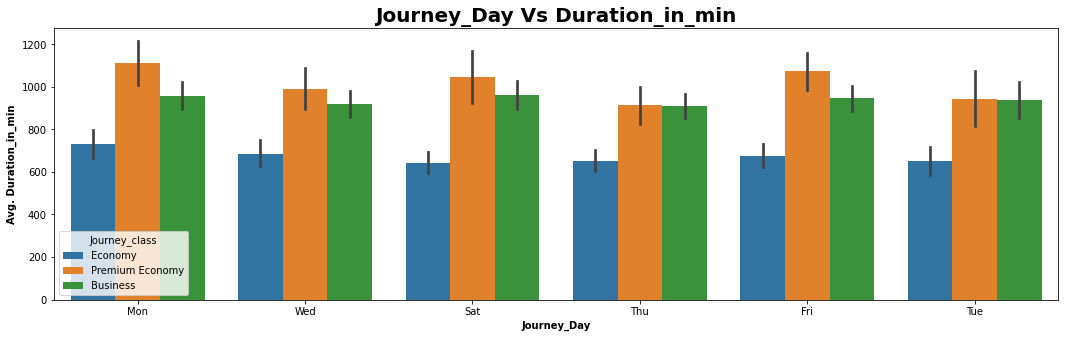

In [38]:
plt.figure(figsize =(18,5))
sns.barplot(x=data['Journey_Day'],y=data['Duration_in_min'],hue=data['Journey_class'])
plt.title("Journey_Day Vs Duration_in_min",fontsize=20,fontweight ='bold')
plt.xlabel('Journey_Day',fontweight ='bold')
plt.ylabel('Avg. Duration_in_min',fontweight ='bold')
plt.show()

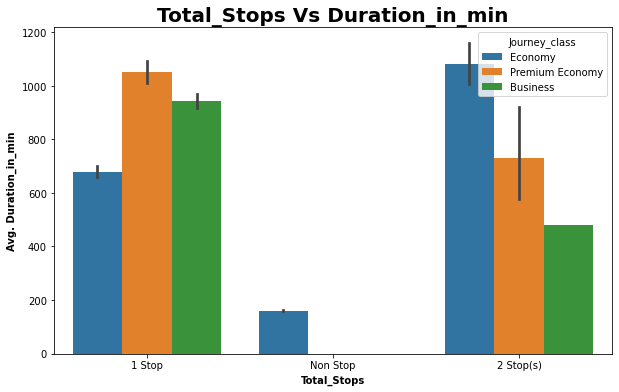

In [40]:
plt.figure(figsize =(10,6))
sns.barplot(x=data['Total_Stops'],y=data['Duration_in_min'],hue=data['Journey_class'])
plt.title("Total_Stops Vs Duration_in_min",fontsize=20,fontweight ='bold')
plt.xlabel('Total_Stops',fontweight ='bold')
plt.ylabel('Avg. Duration_in_min',fontweight ='bold')
plt.show()

#### Observations:

1. Every day, between three differnt journey class, maximum duration is for Premium Economy class.
2. There is no non stop flight for Business and Premium Economy class.

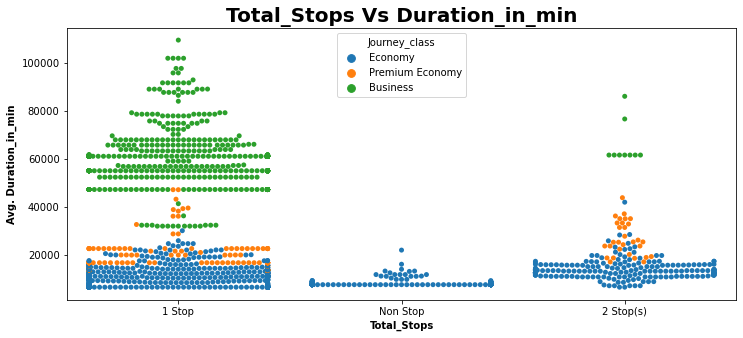

In [41]:
plt.figure(figsize =(12,5))
sns.swarmplot(x=data['Total_Stops'],y=data['Price'],hue=data['Journey_class'])
plt.title("Total_Stops Vs Duration_in_min",fontsize=20,fontweight ='bold')
plt.xlabel('Total_Stops',fontweight ='bold')
plt.ylabel('Avg. Duration_in_min',fontweight ='bold')
plt.show()

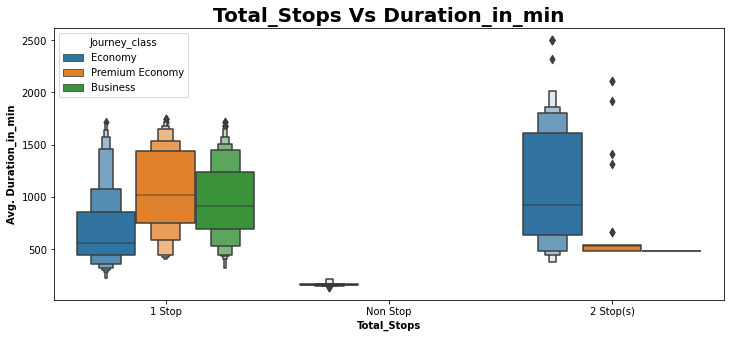

In [20]:
plt.figure(figsize =(12,5))
sns.boxenplot(x=data['Total_Stops'],y=data['Duration_in_min'],hue=data['Journey_class'])
plt.title("Total_Stops Vs Duration_in_min",fontsize=20,fontweight ='bold')
plt.xlabel('Total_Stops',fontweight ='bold')
plt.ylabel('Avg. Duration_in_min',fontweight ='bold')
plt.show()

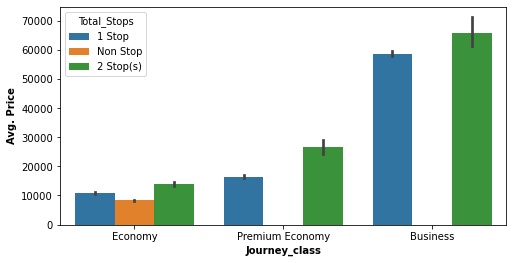

In [43]:
plt.figure(figsize =(8,4))
sns.barplot(x=data['Journey_class'],y=data['Price'],hue=data['Total_Stops'])
plt.xlabel('Journey_class',fontweight ='bold')
plt.ylabel('Avg. Price',fontweight ='bold')
plt.show()

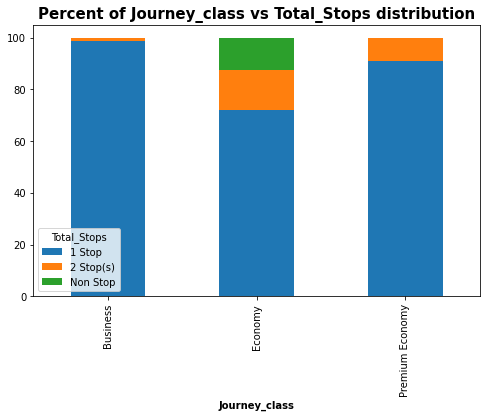

In [44]:
table= pd.crosstab(data['Journey_class'], data['Total_Stops'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True, figsize=(8,5))
plt.title('Percent of Journey_class vs Total_Stops distribution', fontsize=15, fontweight='bold')
plt.xlabel('Journey_class',fontweight ='bold')
plt.show()

#### Observations:

1. For business and premium economy class there are no nonstop flight.

## Feature Engineering:

#### 1. Drop unnecessary columns:

In [45]:
data.nunique()

Airlines_name        9
Journey_class        3
Aeroplane_model    266
Source               1
Destination          1
Departure_Time      90
Arrival_Time       144
Total_Stops          3
Price              390
Duration_in_min    189
Journey_Day          6
Journey_Date        11
dtype: int64

In [ ]:
# Dropping Unnecessary columns
data.drop(columns=['Source','Destination'], inplace= True)

#### Observations:

As there is one source and one destination, we drop this.

#### 2. Encoding Categorical Data (Using Label encoder):

In [47]:
cat= ['Airlines_name', 'Journey_class', 'Aeroplane_model', 'Total_Stops', 'Journey_Day', 'Journey_Date']
num= ['Price', 'Duration_in_min']

In [48]:
data['Aeroplane_model'].head()

0    6E-259/7446
1    6E-6172/887
2    6E-6172/413
3     6E-563/847
4    6E-6525/249
Name: Aeroplane_model, dtype: object

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    data[i] =le.fit_transform(data[i])
data.sample(n=3)

,Airlines_name,Journey_class,Aeroplane_model,Departure_Time,Arrival_Time,Total_Stops,Price,Duration_in_min,Journey_Day,Journey_Date
1251,4,1,37,19:55,22:25,2,7574,150,0,3
627,4,1,45,23:30,09:25\n+ 1 day,0,6507,595,3,2
1168,6,1,222,10:20,22:50,0,9802,750,4,4


In [50]:
times=['Departure_Time','Arrival_Time']

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in times:
    data[i] =le.fit_transform(data[i])
data.sample(n=3)

,Airlines_name,Journey_class,Aeroplane_model,Departure_Time,Arrival_Time,Total_Stops,Price,Duration_in_min,Journey_Day,Journey_Date
1236,1,1,81,33,106,0,15663,585,4,4
1740,7,0,232,81,101,0,47158,1355,5,1
2137,2,0,77,33,0,0,60996,815,2,9


#### Observations:

We have sucessfully converted Categorical variable in numerical variable using label encoder.

#### 3. Correlation:

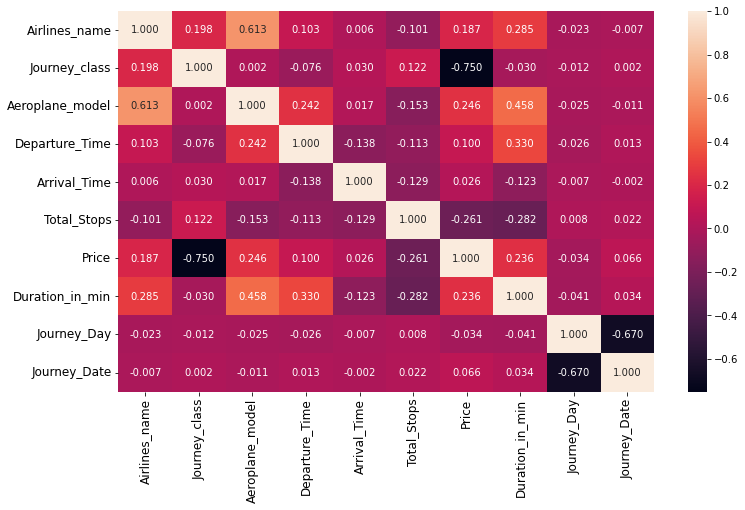

In [52]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True, fmt='0.3f',)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

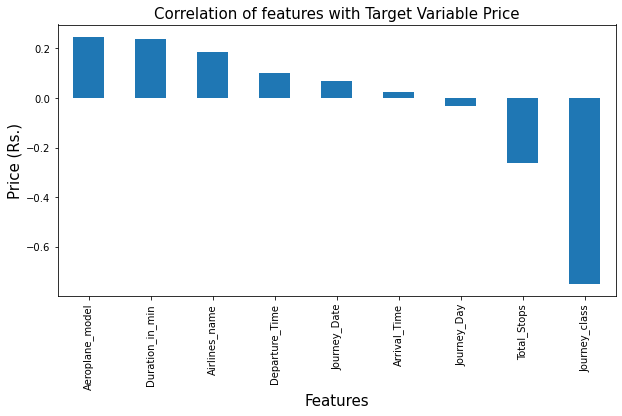

In [53]:
plt.figure(figsize = (10,5))
data.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price (Rs.)',fontsize=15)
plt.title('Correlation of features with Target Variable Price',fontsize = 15)
plt.show()

#### Observations:

1. We can class is highly correlated with target variable Price.
2. Most of features are moderately & poorly correlated with each other.

#### 4. Skewness:

In [54]:
data.skew()

Airlines_name     -0.354040
Journey_class      0.128569
Aeroplane_model   -0.170871
Departure_Time    -0.161324
Arrival_Time      -0.135166
Total_Stops        2.192857
Price              1.125640
Duration_in_min    0.653117
Journey_Day        0.152558
Journey_Date       0.007611
dtype: float64

#### Observations:

1. We can see Price, Total_Stops are skewed features.
2. We cannot transform Price features as it is target variable while stops is categorical variable so concept of skewness doesnot applicable to it.

#### 5. Outliers detections:


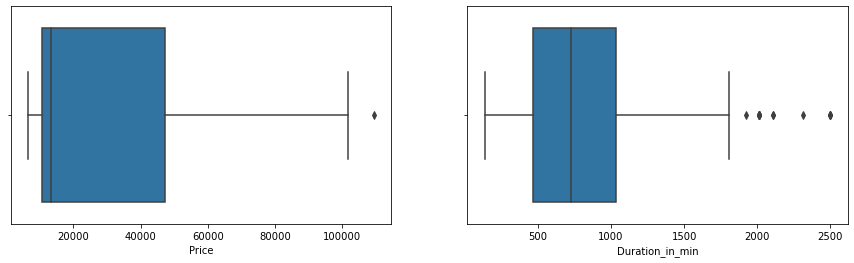

In [55]:
Num=['Price','Duration_in_min' ]
plt.figure(figsize=(15,4))
plt_num = 1
for i in Num:
    if plt_num <= 2:
        ax = plt.subplot(1,2,plt_num)
        sns.boxplot(data[i])
        plt.xlabel(i)
    plt_num += 1
plt.show()

#### Observations:

From Boxplot we can see presense of outliers. Since Data is realstic and data is error-free, we will Proceed for building ML model without removing outliers. Since Outliers detected are with realstic value.

### Standard Scaling :

In [56]:
# Splitting data in target and dependent feature
x = data.drop(['Price'], axis=1)
y = data['Price']

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

## Final predictions using different Regression ML Models :

#### Find best Random state:

In [58]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_max=0
random_max=0
for i in range(1000, 1500):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.7557632728766102 on Random_state 1454


In [59]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (1762, 9)
Training target shape: (1762,)
Test feature shape: (588, 9)
Test target shape: (588,)


#### Observations:
For random state=1454, the accuracy score is best. Lets take this random state for further steps.

### 1. Using LinearRegression()

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state= 1454)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7557632728766102
Mean absolute error: 9218.753892938974
Mean square error: 122447731.40484563
Root mean square error: 11065.610304219357


#### Hyperparameter Tuning Using GridSearchCV:

In [67]:
from sklearn.model_selection import GridSearchCV
grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])
grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)
grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [68]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)
grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7557632728766102
Mean absolute error: 9218.753892938974
Mean square error: 122447731.40484563
Root mean square error: 11065.610304219357


#### Observations:

No such improvement seen after GridSearchCV.

### 2. Using DecisionTreeRegressor():

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9482622765368676
Mean absolute error: 2092.2976190476193
Mean square error: 25938633.147959184
Root mean square error: 5092.9984437420735


#### Using GridSearchCV:

In [84]:
param = {'criterion' : ["squared_error", "absolute_error", "friedman_mse"], 'min_samples_split' : range(1,5),
    'splitter' : ["best", "random"], 'max_features':["auto", "sqrt", "log2"],'min_samples_leaf' : range(1,5)}
grid_search = GridSearchCV(estimator = dt,cv=5,param_grid = param)
grid_search.fit(x_train, y_train)
print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'squared_error', 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'best'}


In [99]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)
y_pred = grid_dt_best.predict(x_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9574294591488841
Mean absolute error: 2308.3312580984775
Mean square error: 21342679.347578093
Root mean square error: 4619.813778452341


#### Observations:

After using Gridseaech CV, R2 is slightly improved.

### 3. Using KNeighborsRegressor():

In [74]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0,20):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 6982.961935637185
RMSE value for k=  2 is: 5619.56585077446
RMSE value for k=  3 is: 5048.789101304964
RMSE value for k=  4 is: 5141.940897103639
RMSE value for k=  5 is: 5266.526228793647
RMSE value for k=  6 is: 5423.348644982894
RMSE value for k=  7 is: 5518.027817561621
RMSE value for k=  8 is: 5577.268842955183
RMSE value for k=  9 is: 5587.464651935215
RMSE value for k=  10 is: 5731.881193756264
RMSE value for k=  11 is: 5732.641126524276
RMSE value for k=  12 is: 5799.090713299144
RMSE value for k=  13 is: 5870.533613706907
RMSE value for k=  14 is: 5962.732508172468
RMSE value for k=  15 is: 5982.323807106762
RMSE value for k=  16 is: 6046.0442753295365
RMSE value for k=  17 is: 6116.451685558471
RMSE value for k=  18 is: 6186.3207040725365
RMSE value for k=  19 is: 6314.591622140402
RMSE value for k=  20 is: 6474.274745588482


In [73]:
min(rmse_val)

5048.789101304964

#### For k=3 we get the best RMSE value for KNeighborsRegressor()

In [75]:
knn =KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9491565879888462
Mean absolute error: 2859.391723356009
Mean square error: 25490271.389455784
Root mean square error: 5048.789101304964


#### Using GridSearchCV:

In [76]:
param = {'algorithm' : ['auto', 'ball_tree', 'kd_tree'], 'leaf_size' : [30,40,25,50],
         'n_neighbors' : [3,4],'weights': ['uniform', 'distance'], 'p':[1,2,3,0]}

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv= 9)
gridsearchknn.fit(x_train, y_train)
print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 50, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [77]:
grid_knn_best = gridsearchknn.best_estimator_
grid_knn_best.fit(x_train, y_train)
y_pred = grid_knn_best.predict(x_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9495017301866335
Mean absolute error: 2829.272231654459
Mean square error: 25317234.845652957
Root mean square error: 5031.623480115832


#### Observations:

R2 Score is slightly improved after GridSearchCV.

### 4. Using RandomForestRegressor():

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9665228612913833
Mean absolute error: 2144.809149659864
Mean square error: 16783715.279334355
Root mean square error: 4096.793292238986


#### Using GridSearchCV:

In [39]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators' : [100,110,80, 120], 'criterion' : ["squared_error", "absolute_error", "poisson"],
         'min_samples_split':[1,2,3,4],'ccp_alpha':[0,1.0,1.5,0.5]}
rf_grd = GridSearchCV(rf, param_grid = params,cv=5)
rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'ccp_alpha': 1.0, 'criterion': 'squared_error', 'min_samples_split': 2, 'n_estimators': 110}


In [40]:
grid_rf_best = rf_grd.best_estimator_
grid_rf_best.fit(x_train, y_train)
y_pred = grid_rf_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9667869366077368
Mean absolute error: 2127.4171017682747
Mean square error: 16651321.499789609
Root mean square error: 4080.6030804024067


#### Observations:

r2 score,RMSE is slightly improved after GridSearchCV.

### 5. Using Support Vector Regression():

In [105]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.3412579736537018
Mean absolute error: 16183.352746828412
Mean square error: 672437753.4734323


In [106]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.3417086482142222
Mean absolute error: 16171.778296485467
Mean square error: 672663698.5153084


In [107]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.25676807289584214
Mean absolute error: 15562.896229666392
Mean square error: 630078863.4069362


#### Observations:

R2 score is very poor after using svm. So let's skip this.

### 6. Using GradientBoostingRegressor()

In [41]:
from sklearn.ensemble import  GradientBoostingRegressor
gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)
y_pred = gbdt.predict(x_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9583532719724313
Mean absolute error: 2766.409916084396
Mean square error: 20879527.118925393
Root mean square error: 4569.41211961948


#### Using GridSearchCV:

In [42]:
params = {'loss': ['squared_error', 'absolute_error'], 'n_estimators':[100,120,80],
          'criterion':['squared_error', 'mse'],'max_features': ['auto', 'sqrt']}
gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'criterion': 'mse', 'loss': 'squared_error', 'max_features': 'auto', 'n_estimators': 120}


In [45]:
grid_gbdt_best = gbdt_grd.best_estimator_
grid_gbdt_best.fit(x_train, y_train)
y_pred = grid_gbdt_best.predict(x_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9591788090160343
Mean absolute error: 2737.6473000339356
Mean square error: 20465645.311015382
Root mean square error: 4523.897137536991


#### Observations:

R2 score, RMSE are slightly improved after GridSearchCV.

### 7. Using AdaBoostRegressor():

In [111]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9198177075141332
Mean absolute error: 4457.388851686235
Mean square error: 40199276.8629511
Root mean square error: 6340.289966787884


#### Using GridSearchCV:

In [112]:
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.001,1,0.01] ,'n_estimators':[50,60,40] }
ada_grd = GridSearchCV(ada, param_grid = params, cv=7)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 40}


In [113]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)
y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9319404686639019
Mean absolute error: 3939.3634616158565
Mean square error: 34121548.01915585
Root mean square error: 5841.3652530171275


#### Observations:

R2 score, RMSE are improved after GridSearchCV.

#### As per 7 different regression model we can see that the model with maximum R2 score and minimum RMSE value is GradientBoostingRegressor() and RandomForestRegressor().

Let's check the cross validation score before final prediction.

### Cross Validation:

In [114]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , grid_dt_best , grid_knn_best , grid_rf_best , grid_gbdt_best, grid_ada_best]
for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [ -4.54252965 -10.4161162   -3.22528208  -0.08391605  -2.20199484]

Mean CV Score : -4.0939677610011795

Std deviation : 3.48096135418638

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor(max_features='auto', min_samples_leaf=4,
                      min_samples_split=4)

 Cross Validation Score :  [ 0.06802338 -0.06214638  0.52514107  0.85258589 -0.65428474]

Mean CV Score : 0.14586384171763367

Std deviation : 0.5163085153878166

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(leaf_size=50, n_neighbors=4, p=1, weights='distance')

 Cross Validation Score :  [-1.11410488 -0.0501814  -1.24452953  0.78382688 -0.5700943 ]

Mean CV Score : -0.4390166451691684

Std deviation : 0.7440854283925357

-----------
-----------
Cross Validation Score of : RandomForestRegressor(ccp_alpha=0, criterion='poisson', min_samples_split=3)

 Cross Validation Score :  [ 0.30265604  0.0

#### Observations:

Here, the cross validation score is very poor for all of the 6 different models. 

But Gradient Boosting Regressor gives better CV Score compare to others. So let's take it.

### Overfitting checking:

In [47]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression
lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha  

16.305806173640438

In [48]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.7556291216144208


In [49]:
#RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.01, 0.1, 0.001),  normalize= True, cv=5 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   #best learning rate for RIDGE
alpha  

0.01

In [50]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.7557628438250571


#### Observations:

For Lasso and Ridge CV, the score is quite similar and around 75%. This dataset is free from overfitting problem.

## Final Model:

In [52]:
y_pred = grid_gbdt_best.predict(x_test)

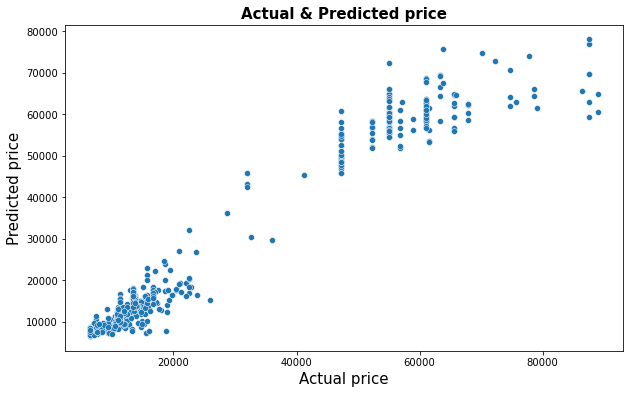

In [53]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,6))
sns.scatterplot(y_test.round(2), y_pred)
plt.xlabel("Actual price", fontsize= 15)
plt.ylabel("Predicted price",fontsize= 15)
plt.title("Actual & Predicted price" , fontsize= 15, fontweight= 'bold')
plt.show()

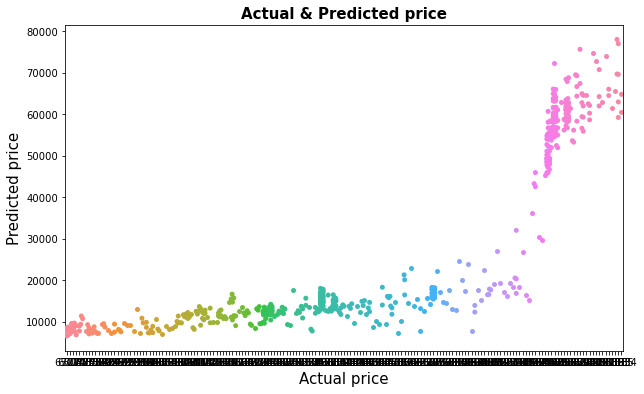

In [54]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,6))
sns.swarmplot(y_test.round(2), y_pred)
plt.xlabel("Actual price", fontsize= 15)
plt.ylabel("Predicted price",fontsize= 15)
plt.title("Actual & Predicted price" , fontsize= 15, fontweight= 'bold')
plt.show()

In [56]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.9591788090160343

Final Mean absolute error: 2737.6473000339356

Final Mean square error: 20465645.311015382

Final Root mean square error: 4523.897137536991


### Important Feature Selection:

In [57]:
feature= x.columns
feature

Index(['Airlines_name', 'Journey_class', 'Aeroplane_model', 'Departure_Time',
       'Arrival_Time', 'Total_Stops', 'Duration_in_min', 'Journey_Day',
       'Journey_Date'],
      dtype='object')

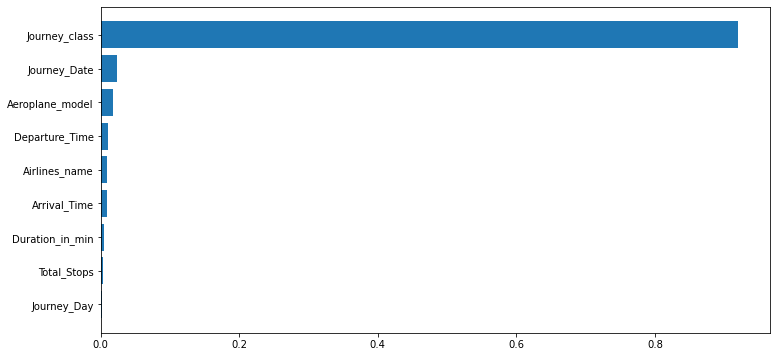

In [61]:
fimp = list(zip(feature,grid_gbdt_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(12,6))
plt.barh([x[0] for x in fimp],[x[1] for x in fimp])
plt.show()

#### Observations:

1. Journey class is the most important feature for predicting price.
2. Total duration of journey,total stops, journey day are the less importance feature.

### Load and save the model

Now , let's save the model for future use.

In [62]:
import pickle
pickle.dump(grid_gbdt_best, open("Flight_Price_Regression_model", "wb"))

In [43]:
import pickle
load_Flight_Price_Regression_model= pickle.load(open("Flight_Price_Regression_model", "rb"))

In [61]:
y_pred = load_Flight_Price_Regression_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred.round(0)
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=5)

,Predicted Values,Actual Values
446,12459.0,13563
90,13933.0,13227
483,14517.0,15740
64,13766.0,15401
505,59404.0,54975
